<a href="https://colab.research.google.com/github/Kajlid/Final-project-Machine_Learning/blob/Simon%2C-try-1-on-DBSCAN/DBScan_Simon(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DBScan -Simon**

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm

it's usfule becuse it dont need to know the nubers of clusters as a parameter instedd it figures out that on itself.

it takes tow parameters,min_sampels and esp

min sampels:The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

esp:The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

sklearn dbscan takes more parameters but thes are the core


# here is my data processing.
 I split into discrete and continuous and transform the discretes into numbers and then reassemble into a dataset

In [25]:
from pandas.core.window.expanding import Axis
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/student-por (1).csv', sep=";")

continues_columns_in_data_set =  ['school', 'sex',"address", 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
discret_columns_in_data_set = data
for element in continues_columns_in_data_set:
  discret_columns_in_data_set = discret_columns_in_data_set.drop(element, axis = 1)

# we need to first encode the categorical columns
data_train_encoded = pd.DataFrame()
for col in continues_columns_in_data_set:
  LE = LabelEncoder()
  dt = LE.fit_transform(data[col])
  data_train_encoded[col] = dt

# combine with the numerical columns
for col in discret_columns_in_data_set:
  data_train_encoded[col] = data[col]

data_train_encoded=data_train_encoded.drop(['G1', 'G2'], axis=1)

print(data_train_encoded)


     school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0         0    0        1        0        0     0     4       0         1   
1         0    0        1        0        1     0     2       0         0   
2         0    0        1        1        1     0     2       2         1   
3         0    0        1        0        1     1     3       1         1   
4         0    0        1        0        1     2     2       1         0   
..      ...  ...      ...      ...      ...   ...   ...     ...       ...   
644       1    0        0        0        1     3     2       0         1   
645       1    0        1        1        1     4     3       0         1   
646       1    0        1        0        1     2     2       0         1   
647       1    1        1        1        1     3     3       0         1   
648       1    1        0        1        1     3     2       0         1   

     schoolsup  ...  studytime  failures  famrel  freetime  goout  Dalc  Wa

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

#without doing anaything to the data
X = data_train_encoded.drop("G3", axis=1)
Y = data_train_encoded["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

clf = DBSCAN()
temp = clf.fit_predict(X_train)
print(temp)
print("\033[1m" + "we notice that everything is labeld as noice"+ "\033[0;0m")


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [34]:
from pandas.core.generic import Axis

coorelation = data_train_encoded.corr()
coorelation.style.background_gradient(cmap='coolwarm', axis=None)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,1.000000,-0.083050,-0.354520,0.022252,0.028120,-0.206829,-0.081872,-0.109754,-0.062333,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,0.087170,-0.254787,-0.209806,0.252936,-0.137857,0.113788,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.284294
sex,-0.083050,1.000000,0.025503,0.098205,0.064700,0.149635,0.080466,0.010732,-0.036811,-0.111202,-0.129467,0.079300,0.124707,-0.043603,-0.058134,0.065911,-0.110144,-0.043662,0.119127,0.083913,0.040880,-0.206214,0.073888,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.129077
address,-0.354520,0.025503,1.000000,0.046113,-0.094635,0.159761,-0.006535,-0.002367,-0.019359,0.017956,0.005577,-0.030483,-0.009278,0.018077,0.076706,0.175794,-0.030939,-0.025848,0.190320,0.141493,-0.344902,0.062023,-0.063824,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.167637
famsize,0.022252,0.098205,0.046113,1.000000,-0.239608,0.019600,-0.059443,0.032321,0.000872,-0.056405,-0.039819,-0.050253,-0.014790,0.100686,0.004523,0.013357,-0.032936,-0.002470,-0.014325,-0.039538,0.012794,-0.010945,-0.066068,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.045016
Pstatus,0.028120,0.064700,-0.094635,-0.239608,1.000000,-0.028874,0.054306,-0.031486,-0.169904,-0.009456,0.010203,0.015923,0.101555,-0.032724,0.022726,0.059754,-0.053828,-0.005631,-0.057174,-0.031856,0.040633,-0.008748,-0.009881,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,-0.000754
Mjob,-0.206829,0.149635,0.159761,0.019600,-0.028874,1.000000,0.202651,0.059397,0.008196,0.007992,0.038817,0.011869,0.099962,0.041927,0.148116,0.260658,-0.074286,-0.071770,0.459337,0.290703,-0.164126,0.057176,-0.117882,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.148252
Fjob,-0.081872,0.080466,-0.006535,-0.059443,0.054306,0.202651,1.000000,0.042846,-0.075056,-0.013396,-0.038630,-0.020841,0.018356,-0.045800,0.089929,0.088625,-0.002835,-0.050846,0.152582,0.211604,0.004749,-0.019125,-0.055415,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.052953
reason,-0.109754,0.010732,-0.002367,0.032321,-0.031486,0.059397,0.042846,1.000000,-0.065834,0.047945,0.011243,-0.051093,0.076532,0.043556,0.091324,0.110168,-0.050643,-0.025855,0.132855,0.080760,-0.092522,0.135874,-0.144459,0.036657,-0.047001,-0.008255,-0.010735,0.010612,-0.121866,0.015861,0.124969
guardian,-0.062333,-0.036811,-0.019359,0.000872,-0.169904,0.008196,-0.075056,-0.065834,1.000000,-0.041361,0.016370,0.071614,0.014028,-0.023060,-0.114735,-0.000412,0.106190,0.266830,-0.014044,-0.101764,0.026519,-0.009911,0.169605,-0.052143,0.051442,0.054880,0.023330,-0.008312,0.016556,0.150426,-0.079609
schoolsup,-0.123340,-0.111202,0.017956,-0.056405,-0.009456,0.007992,-0.013396,0.047945,-0.041361,1.000000,0.075402,0.040512,-0.030246,0.017846,0.085355,-0.025942,-0.094310,-0.167841,-0.022168,0.023572,-0.044807,0.089316,-0.000745,-0.012038,-0.015611,-0.058124,-0.028076,-0.098275,0.022760,-0.059503,-0.066405


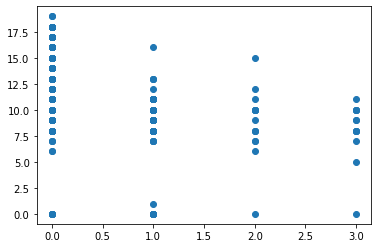

In [36]:
import matplotlib.pyplot as plt

plt.scatter(data_train_encoded["failures"], data_train_encoded["G3"])

(649, 31)
(649, 31)


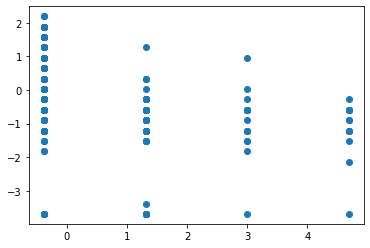

In [42]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(data_train_encoded)
data_train_encoded_transformed = scalar.transform(data_train_encoded)

print(data_train_encoded.shape) 
print(data_train_encoded_transformed.shape)

plt.scatter(data_train_encoded_transformed[:,-9], data_train_encoded_transformed[:,-1])